# IIQ3763 - Cell Cycle controlled production and degradation of Fluorescent Proteins

## Import the necessary modules

In [1]:
import matplotlib.pyplot as plt # Used for plotting graphs
import numpy as np # Used for manipulation of data stored in arrays
import scipy 
from scipy.integrate import odeint # Function used for numerical integration of ODEs
from mpl_toolkits.mplot3d import Axes3D # Maplotlib module used for three dimensional plotting

%matplotlib inline

## Define the parameters for the model

In [2]:
# Parameters for pcyca_tf

k_cyca = 0.01 # Activation rate for pCYCA transcription factor
d_cyca = 6 # Inactivation rate for pCYCA transcription factor
k_ca_cb = 0.2 # Measure of the strength of the interaction between pCYCA transcription factor and pCYCB transcription factor
n1 = 8 # Hill cooperativity

# Parameters for cdka

k_cdka = 1.5 # Activation rate for CDKA
d_cdka = 0.6 # Inactivation rate for CDKA
k_ca_cdka = 0.3 # Measure of the strength of the interaction between pCYCA transcription factor and CDKA
n2 = 4 # Hill cooperativity

# Parameters for pcycb_tf

k_cycb = 1.5 # Activation rate for pCYCB transcription factor
d_cycb = 0.6 # Inactivation rate for pCYCB transcription factor
k_cb_cdka = 0.3 # Measure of the strength of the interaction between CDKA and pCYCB transcription factor
n3 = 4 # Hill cooperativity

# Parameters for Venus mRNA and Protein

k_venusmrna = 240 # Maximum transcription rate of RNA polymerase in eukaryotes
d_venusmrna = 0.2 # Degradation rate of mRNA
k_venusprot = 1000 # Maximum mRNA translation rate
d_venusprot = 1 # Degradation rate of Venus protein

# Parameters for VirF mRNA and Protein

k_virfmrna = 240 # Maximum transcription rate of RNA polymerase in eukaryotes
d_virfmrna = 0.2 # Degradation rate of mRNA
k_virfprot = 1000 # Maximum mRNA translation rate
d_virfprot = 0.5 # Degradation rate of VirF protein

# Timestep

Dt = 0.05

## Initial conditions for the model

In [3]:
def initialize():
    
    global \
    pcyca_tf, cdka, pcycb_tf, pcyca_tf_results, cdka_results, pcycb_tf_results,\
    venus_mrna, venus_mrna_results, venus_prot, venus_prot_results, virf_mrna,\
    virf_mrna_results, virf_prot, virf_prot_results, t, timesteps
    
    # Initial conditions
    
    '''
    The model starts from an initial state where all variables equal zero, and given the fact
    that the differential equations are autonomous, the starting time can also be set to
    equal zero.
    
    The result arrays correspond to the arrays which will store the information for each variable
    at each timestep, and will be used to plot the graphs and analyze the dynamics of the system
    '''
    
    pcyca_tf = 0.
    cdka = 0.
    pcycb_tf = 0.
    venus_mrna = 0.
    venus_prot = 0.
    virf_mrna = 0.
    virf_prot = 0.
    t = 0.
    
    # Result arrays
    
    pcyca_tf_results = [pcyca_tf]
    cdka_results = [cdka]
    pcycb_tf_results = [pcycb_tf]
    venus_mrna_results = [venus_mrna]
    venus_prot_results = [venus_prot]
    virf_mrna_results = [virf_mrna]
    virf_prot_results = [virf_prot]
    timesteps = [t]

## Observe Function (Used for updating the results at each timestep)

In [4]:
def observe():
    
    '''
    This function is used to append variable results after updating their values on a given
    timestep.
    '''
    
    global \
    pcyca_tf, cdka, pcycb_tf, pcyca_tf_results, cdka_results, pcycb_tf_results,\
    venus_mrna, venus_mrna_results, venus_prot, venus_prot_results, virf_mrna,\
    virf_mrna_results, virf_prot, virf_prot_results, t, timesteps
    
    pcyca_tf_results.append(pcyca_tf)
    cdka_results.append(cdka)
    pcycb_tf_results.append(pcycb_tf)
    venus_mrna_results.append(venus_mrna)
    venus_prot_results.append(venus_prot)
    virf_mrna_results.append(virf_mrna)
    virf_prot_results.append(virf_prot)
    timesteps.append(t)

## Update Function (following the forward Euler method for ODEs)

In [5]:
def update():
    
    '''
    This function is used for the numerical integration of the differential equations involved
    in the system, using the information at a time t, the values of the variables at t+1 will
    be equal to the values at t plus the differential equation time discretized time (Dt).
    
    After each integration is performed, the variable values and time are updated.
    '''
    
    global \
    pcyca_tf, cdka, pcycb_tf, pcyca_tf_results, cdka_results, pcycb_tf_results,\
    venus_mrna, venus_mrna_results, venus_prot, venus_prot_results, virf_mrna,\
    virf_mrna_results, virf_prot, virf_prot_results, t, timesteps
    
    next_pcyca_tf = pcyca_tf + Dt*(k_cyca - d_cyca*pcyca_tf*(pcycb_tf**n1/(k_ca_cb**n1 + pcycb_tf**n1)))
    next_cdka = cdka + Dt*(k_cdka*(1-cdka)*(pcyca_tf**n2/(k_ca_cdka**n2 + pcyca_tf**n2)) - d_cdka*cdka)
    next_pcycb_tf = pcycb_tf + Dt*(k_cycb*(1-pcycb_tf)*(cdka**n3/(k_cb_cdka**n3 + cdka**n3)) - d_cycb*pcycb_tf)
    next_venus_mrna = venus_mrna + Dt*(pcyca_tf*k_venusmrna - d_venusmrna*venus_mrna)
    next_venus_prot = venus_prot + Dt*(venus_mrna*k_venusprot - d_venusprot*(venus_prot+(virf_prot/2)))
    next_virf_mrna = virf_mrna + Dt*(pcycb_tf*k_virfmrna - d_virfmrna*virf_mrna)
    next_virf_prot = virf_prot + Dt*(virf_mrna*k_virfprot - d_virfprot*(virf_prot))
    
    pcyca_tf, cdka, pcycb_tf, venus_mrna, venus_prot, virf_mrna, virf_prot = next_pcyca_tf, next_cdka, next_pcycb_tf, next_venus_mrna, next_venus_prot, next_virf_mrna, next_virf_prot
    t = t + Dt

## Plot the dynamics of the system

### 4.1 - Oscillating behaviour of the activation and repression of Cyclin A promoter transcription factor and Cyclin B promoter transcription factor

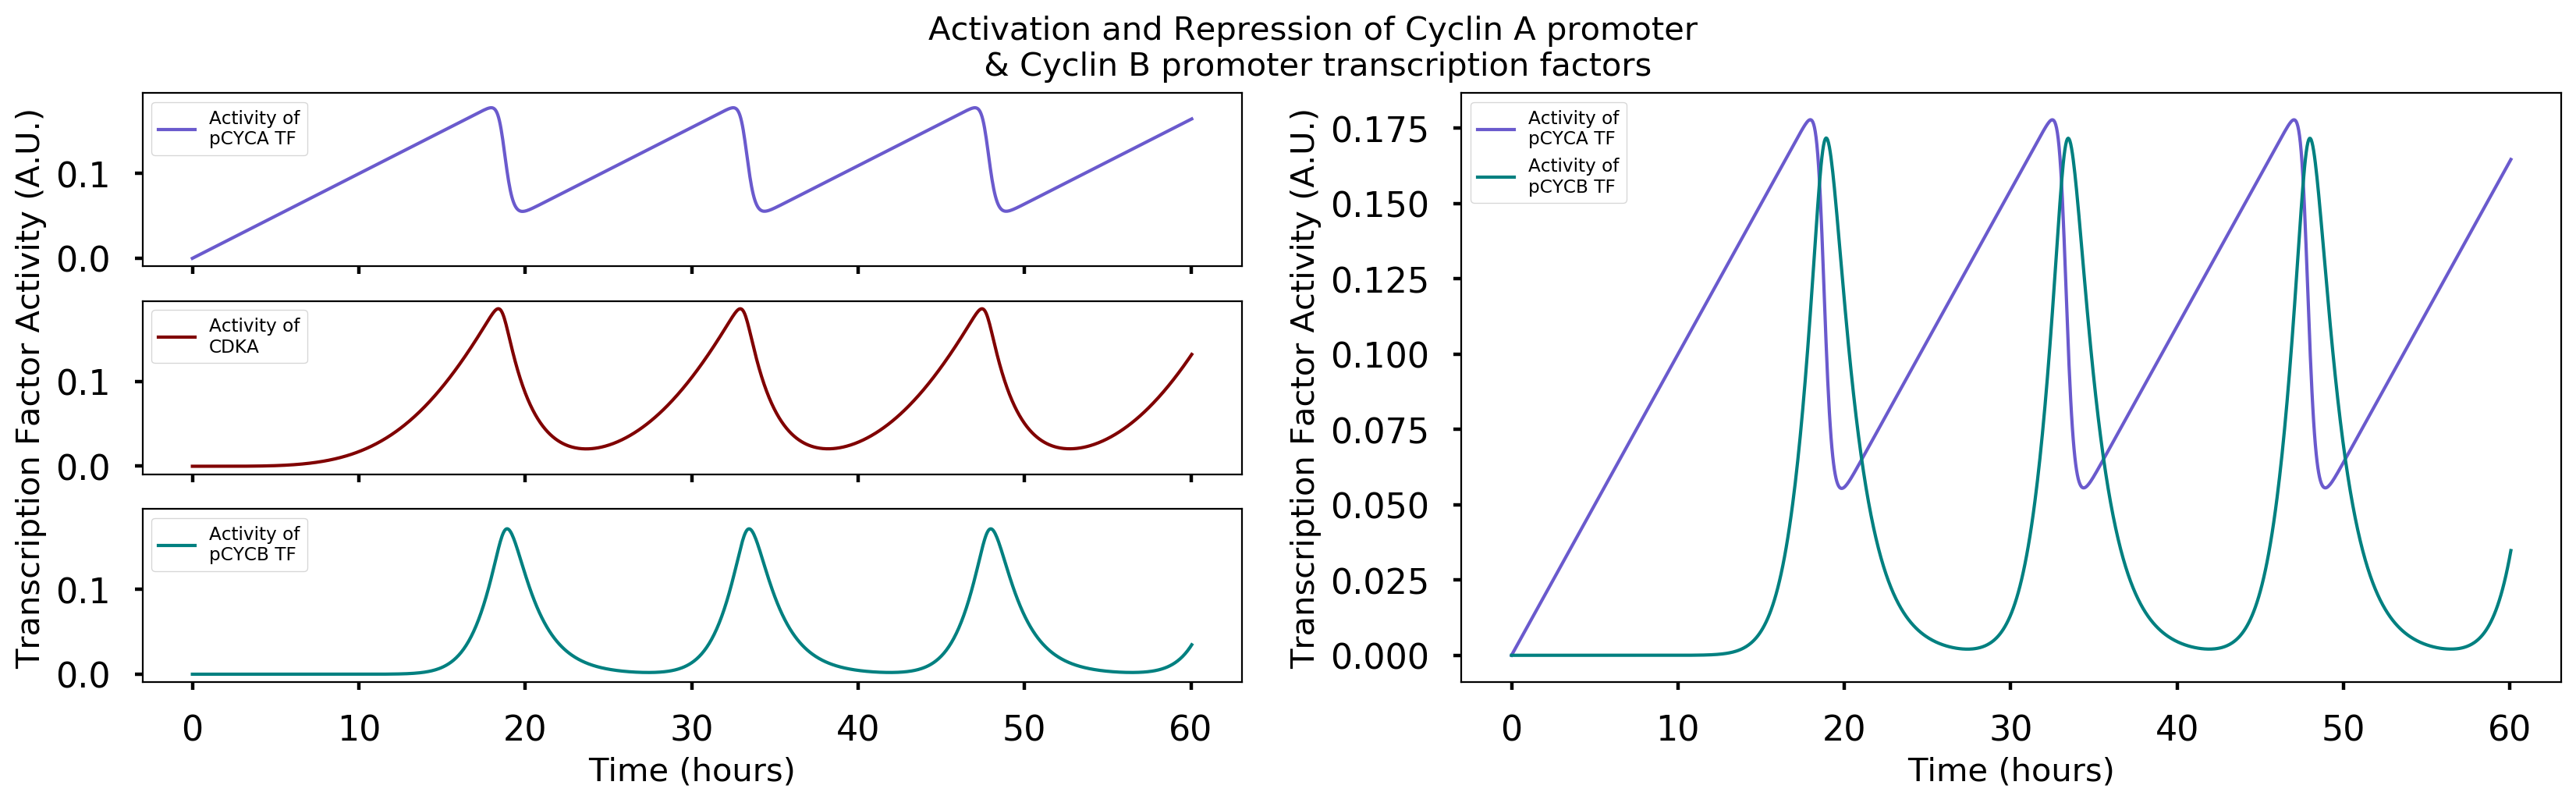

In [6]:
'''
Here we initialize the system according to the initial values, and while time is less than 60
(60 hours in this model) the system updates the variables and appends the results to each 
resulting array.
'''

initialize()

while t < 60.:
    update()
    observe()
    
with plt.style.context('seaborn-poster'):
    
    fig = plt.figure(figsize=(20, 5), dpi=200)
    fig.suptitle('Activation and Repression of Cyclin A promoter\n & Cyclin B promoter transcription factors', fontsize=15)
    gs = fig.add_gridspec(3, 2)
    
    ax1 = fig.add_subplot(gs[0,0])
    ax1.plot(timesteps, pcyca_tf_results, label = 'Activity of\npCYCA TF', lw = 1.5, color = 'slateblue')
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax1.legend(loc='upper left', fontsize='small')
    
    ax2 = fig.add_subplot(gs[1,0], sharey=ax1, sharex=ax1)
    ax2.set_ylabel('Transcription Factor Activity (A.U.)', fontsize=15)
    ax2.plot(timesteps, cdka_results, label = 'Activity of\nCDKA', lw = 1.5, color = 'maroon')
    plt.setp(ax2.get_xticklabels(), visible=False)
    ax2.legend(loc='upper left', fontsize='small')
    
    ax3 = fig.add_subplot(gs[2,0], sharey=ax1, sharex=ax1)
    ax3.set_xlabel('Time (hours)', fontsize=15)
    ax3.plot(timesteps, pcycb_tf_results, label = 'Activity of\npCYCB TF', lw = 1.5, color = 'teal')
    ax3.legend(loc='upper left', fontsize='small')
    
    ax4 = fig.add_subplot(gs[:, 1])
    ax4.set_xlabel('Time (hours)', fontsize=15)
    ax4.set_ylabel('Transcription Factor Activity (A.U.)', fontsize=15)
    ax4.plot(timesteps, pcyca_tf_results, label = 'Activity of\npCYCA TF', lw = 1.5, color = 'slateblue')
    ax4.plot(timesteps, pcycb_tf_results, label = 'Activity of\npCYCB TF', lw = 1.5, color = 'teal')
    ax4.legend(loc='upper left', fontsize='small')        

plt.show()

### 4.2 - Oscillating behaviour of the production and degradation of Venus-VIP1 protein

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


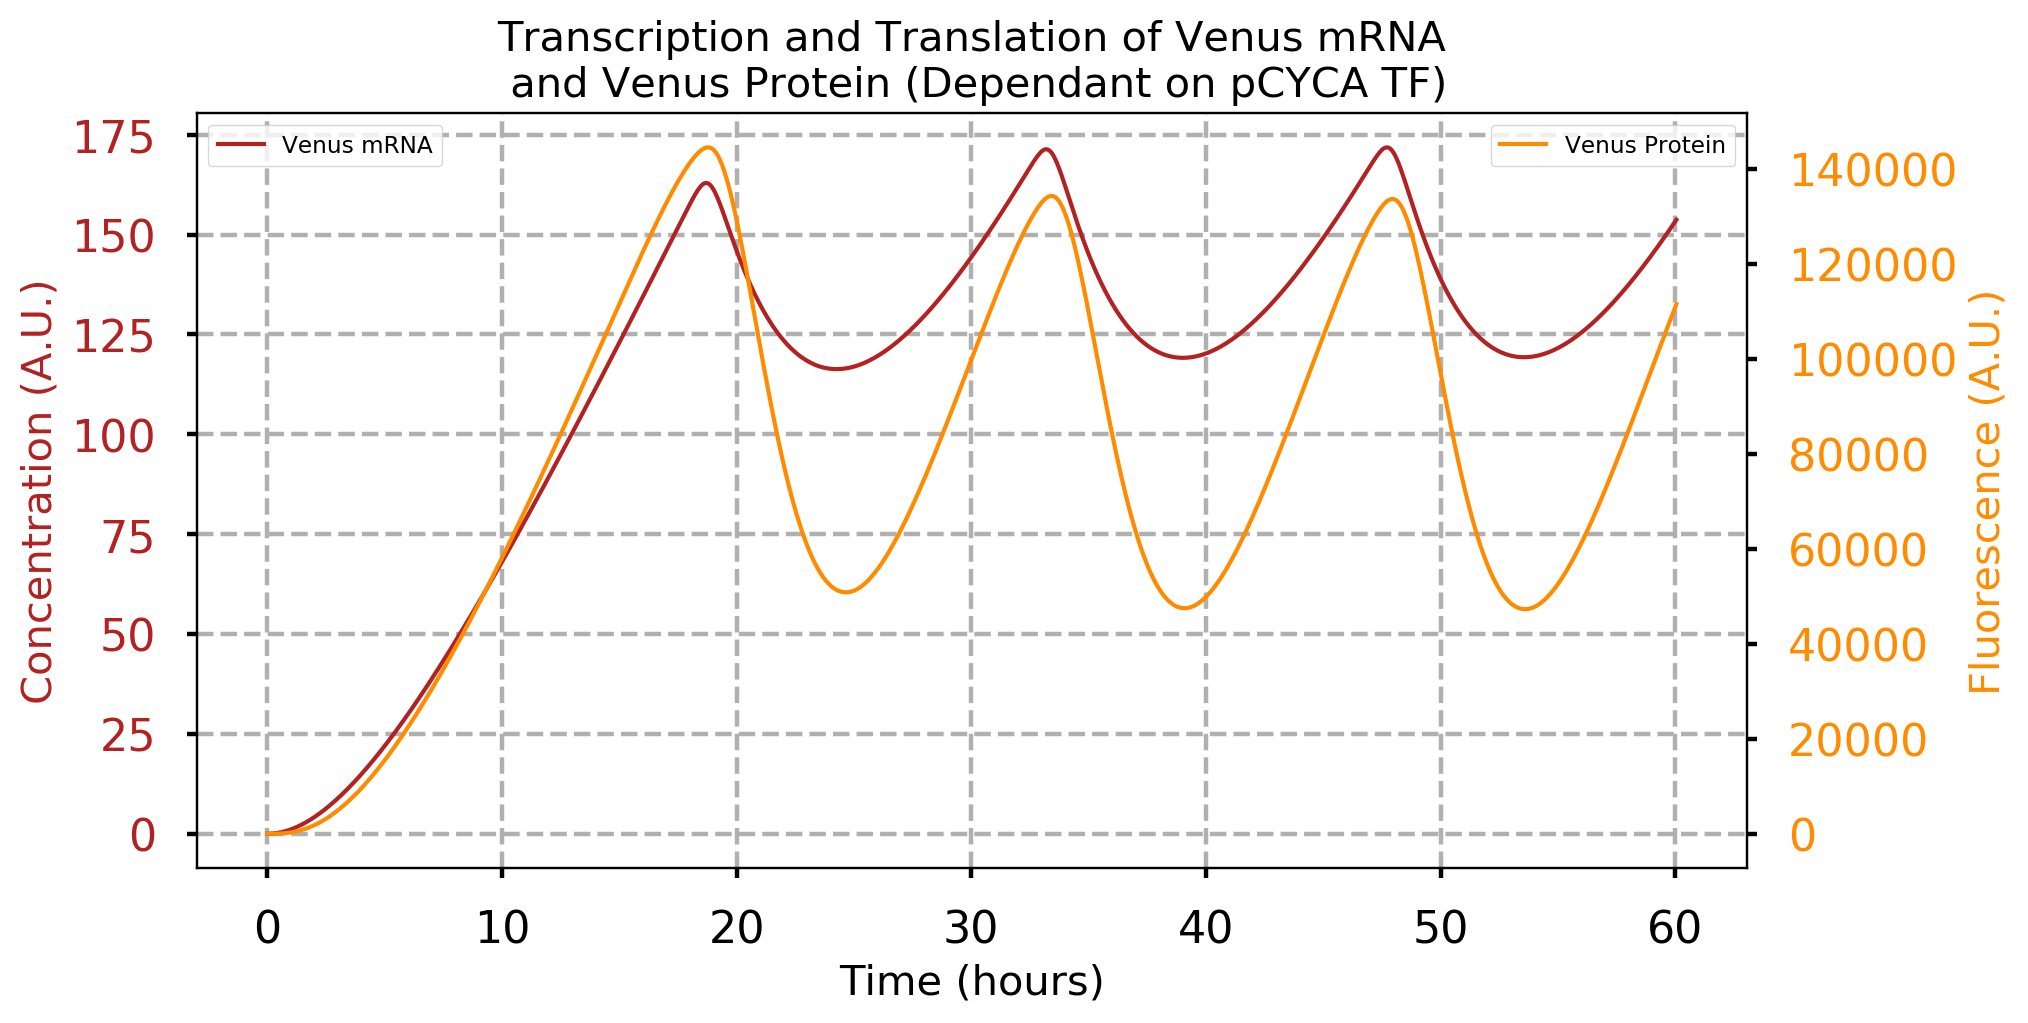

In [7]:
with plt.style.context('seaborn-poster'):
    
    fig = plt.figure(figsize=(10, 5), dpi=200)
    plt.grid('on', ls='--')
    plt.title('Transcription and Translation of Venus mRNA\n and Venus Protein (Dependant on pCYCA TF)', fontsize=15)
    
    ax1 = fig.add_subplot()
    ax1.plot(timesteps, venus_mrna_results, label = 'Venus mRNA', lw = 1.5, color = 'firebrick')
    ax1.set_ylabel('Concentration (A.U.)', fontsize=15, color = 'firebrick')
    ax1.set_xlabel('Time (hours)', fontsize=15)
    ax1.tick_params(axis='y', labelcolor='firebrick')
    plt.legend(loc='upper left', fontsize='small')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Fluorescence (A.U.)', fontsize=15, color = 'darkorange')
    ax2.plot(timesteps, venus_prot_results, label = 'Venus Protein', lw = 1.5, color = 'darkorange')
    ax2.tick_params(axis='y', labelcolor='darkorange')
    plt.legend(loc='upper right', fontsize='small')
    
plt.show()

### 4.3 - Oscillating behaviour of the production and degradation of VirF-dBOX protein

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


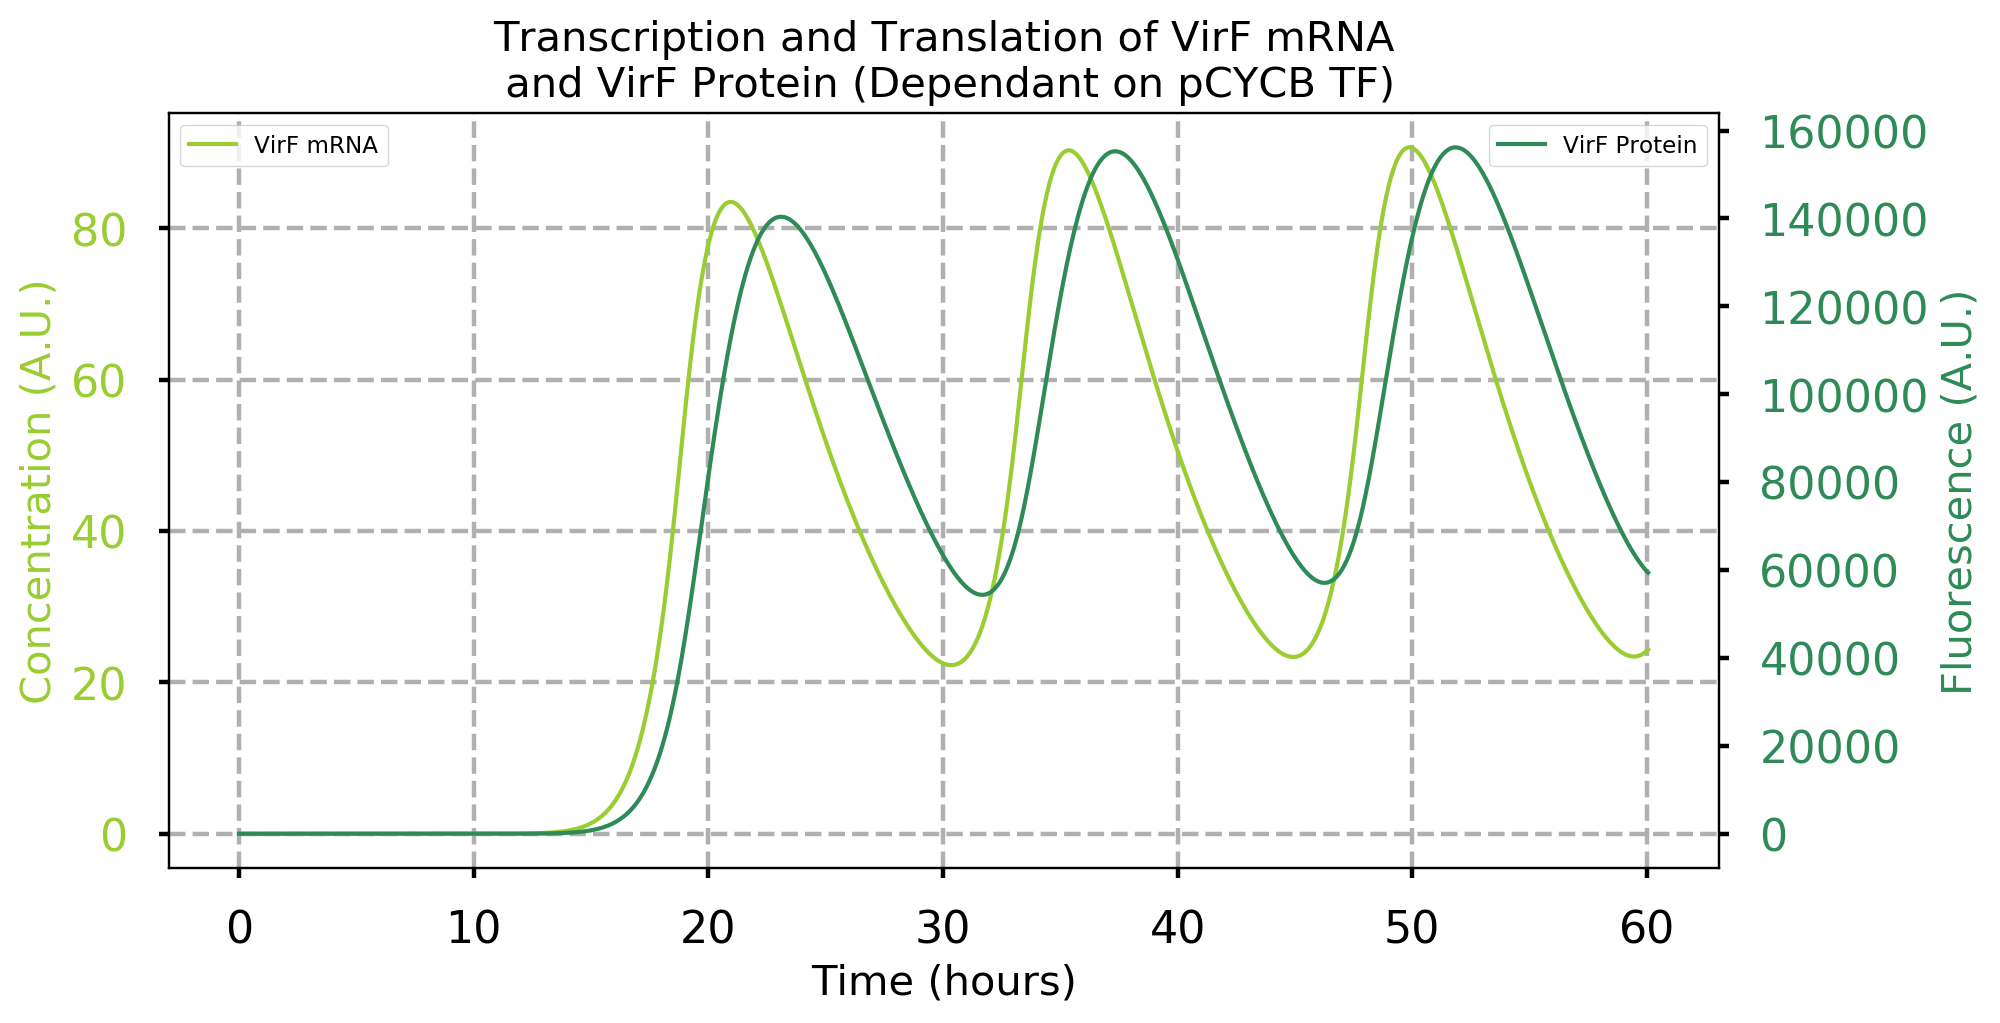

In [8]:
with plt.style.context('seaborn-poster'):
    
    fig = plt.figure(figsize=(10, 5), dpi=200)
    plt.grid('on', ls='--')
    plt.title('Transcription and Translation of VirF mRNA\n and VirF Protein (Dependant on pCYCB TF)', fontsize=15)
    
    ax1 = fig.add_subplot()
    ax1.plot(timesteps, virf_mrna_results, label = 'VirF mRNA', lw = 1.5, color = 'yellowgreen')
    ax1.set_ylabel('Concentration (A.U.)', fontsize=15, color = 'yellowgreen')
    ax1.set_xlabel('Time (hours)', fontsize=15)
    ax1.tick_params(axis='y', labelcolor='yellowgreen')
    plt.legend(loc='upper left', fontsize='small')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Fluorescence (A.U.)', fontsize=15, color = 'seagreen')
    ax2.plot(timesteps, virf_prot_results, label = 'VirF Protein', lw = 1.5, color = 'seagreen')
    ax2.tick_params(axis='y', labelcolor='seagreen')
    plt.legend(loc='upper right', fontsize='small')
    
plt.show()

### 4.4 - Venus protein production dependancy on pCYCA TF activity

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


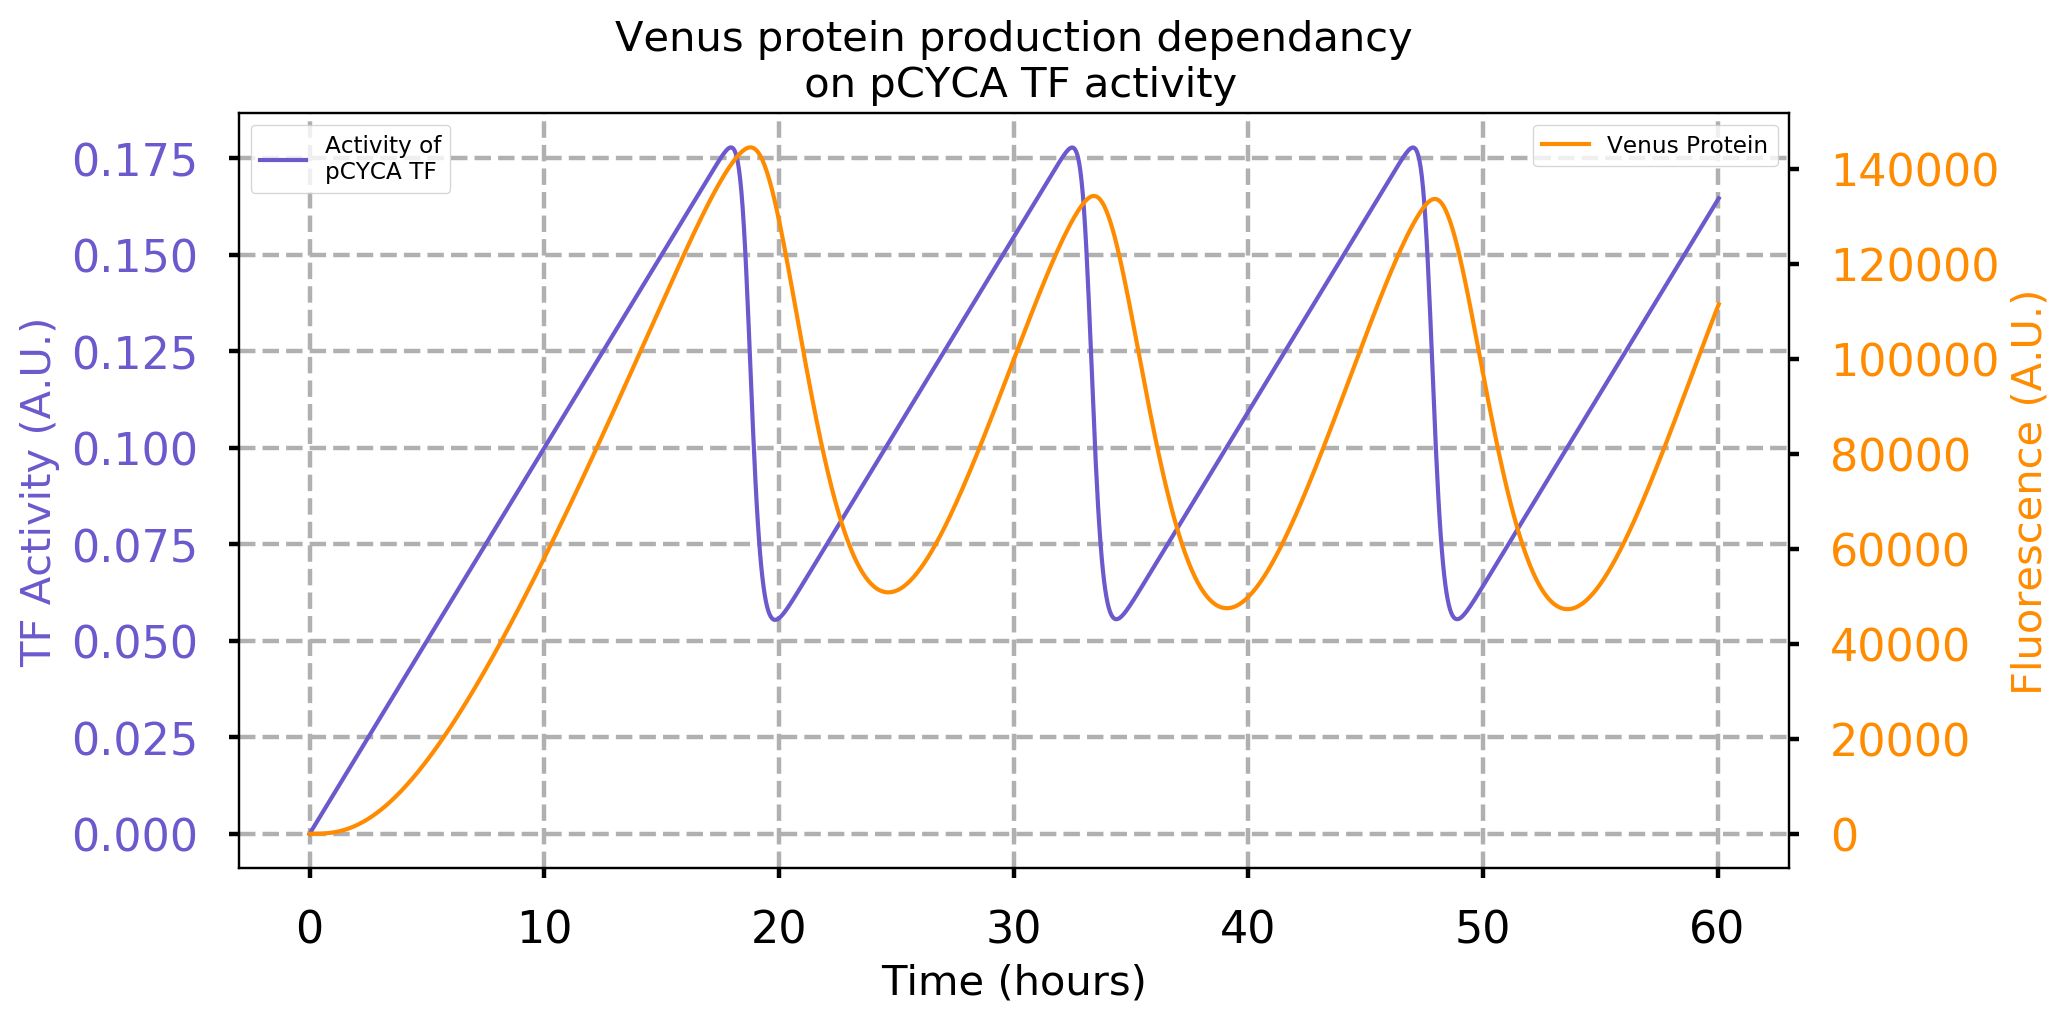

In [9]:
with plt.style.context('seaborn-poster'):
    
    fig = plt.figure(figsize=(10, 5), dpi=200)
    plt.grid('on', ls='--')
    plt.title('Venus protein production dependancy\n on pCYCA TF activity', fontsize=15)
    
    ax1 = fig.add_subplot()
    ax1.plot(timesteps, pcyca_tf_results, label = 'Activity of\npCYCA TF', lw = 1.5, color = 'slateblue')
    ax1.set_ylabel('TF Activity (A.U.)', fontsize=15, color = 'slateblue')
    ax1.set_xlabel('Time (hours)', fontsize=15)
    ax1.tick_params(axis='y', labelcolor='slateblue')
    plt.legend(loc='upper left', fontsize='small')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Fluorescence (A.U.)', fontsize=15, color = 'darkorange')
    ax2.plot(timesteps, venus_prot_results, label = 'Venus Protein', lw = 1.5, color = 'darkorange')
    ax2.tick_params(axis='y', labelcolor='darkorange')
    plt.legend(loc='upper right', fontsize='small')
    
plt.show()

### 4.5 - VirF protein production dependancy on pCYCB TF activity

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


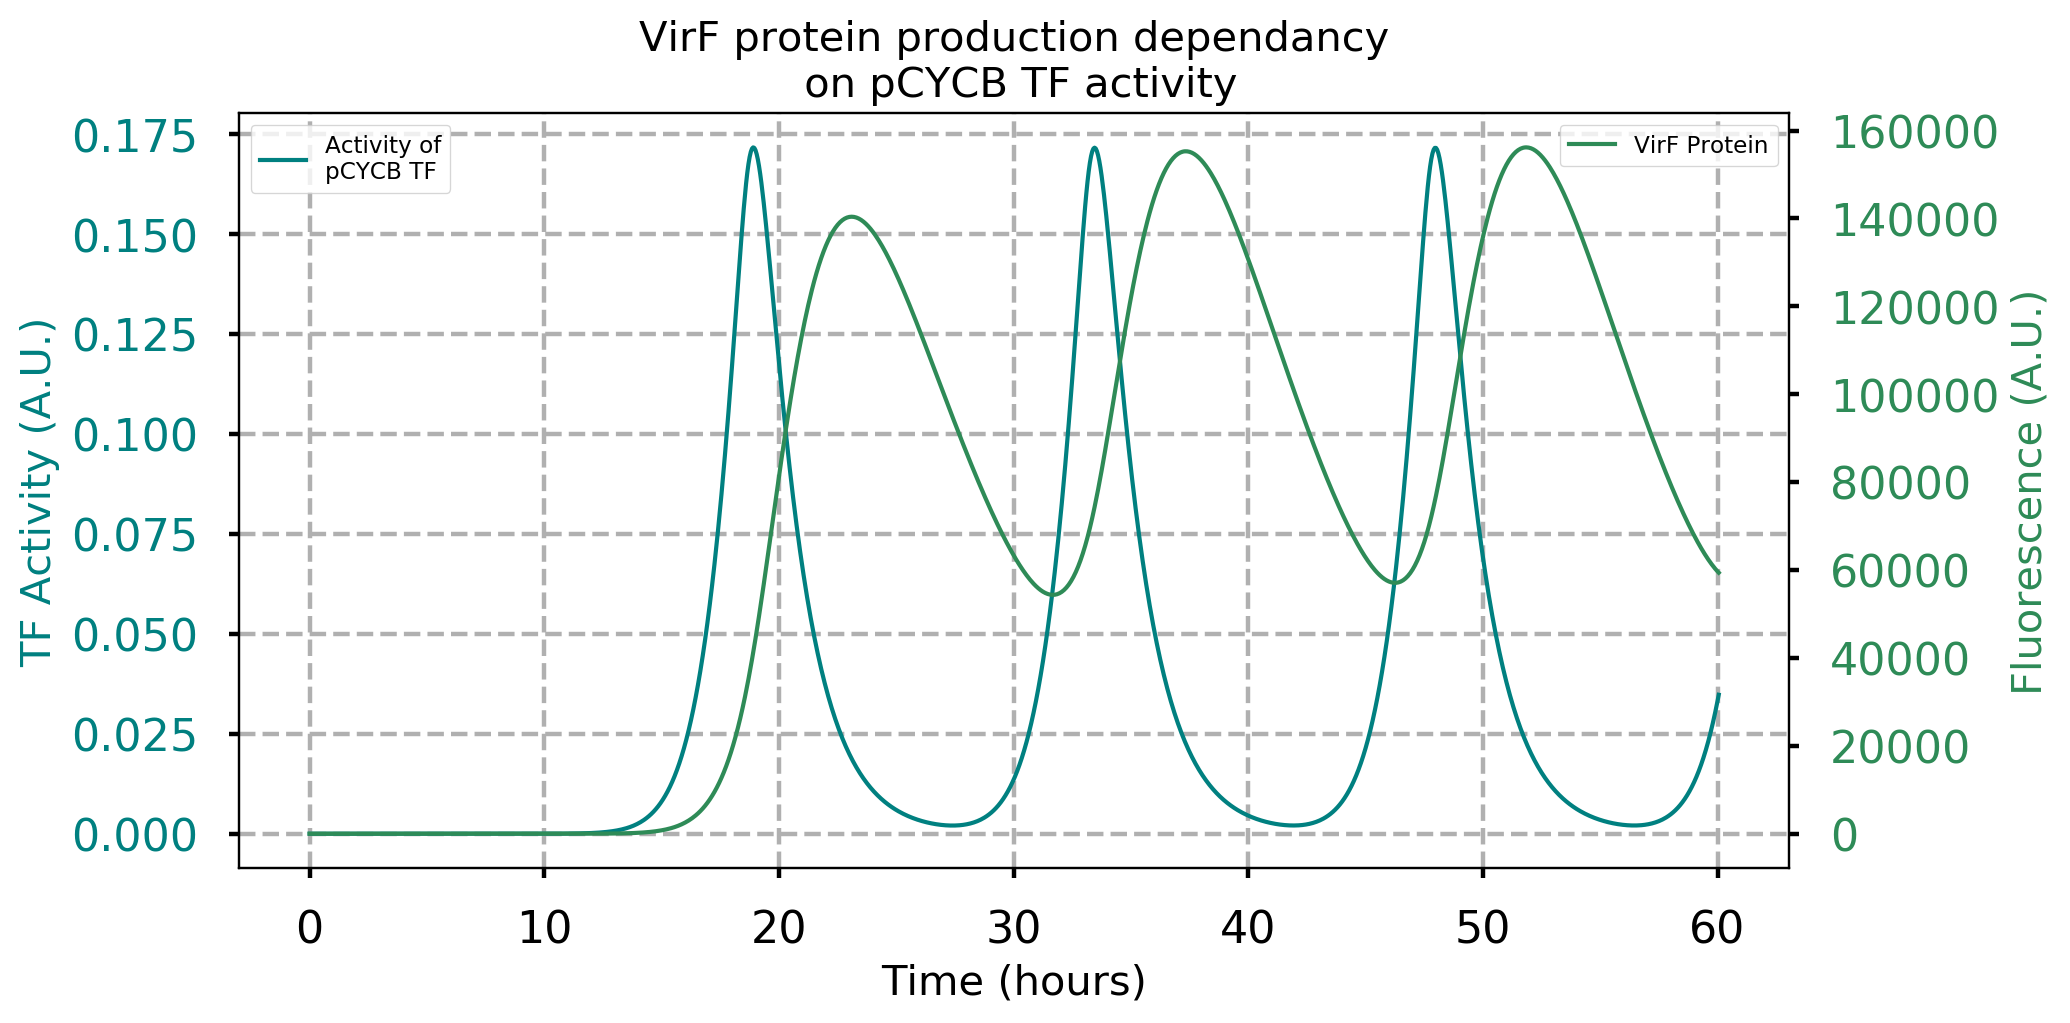

In [10]:
with plt.style.context('seaborn-poster'):
    
    fig = plt.figure(figsize=(10, 5), dpi=200)
    plt.grid('on', ls='--')
    plt.title('VirF protein production dependancy\n on pCYCB TF activity', fontsize=15)
    
    ax1 = fig.add_subplot()
    ax1.plot(timesteps, pcycb_tf_results, label = 'Activity of\npCYCB TF', lw = 1.5, color = 'teal')
    ax1.set_ylabel('TF Activity (A.U.)', fontsize=15, color = 'teal')
    ax1.set_xlabel('Time (hours)', fontsize=15)
    ax1.tick_params(axis='y', labelcolor='teal')
    plt.legend(loc='upper left', fontsize='small')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Fluorescence (A.U.)', fontsize=15, color = 'seagreen')
    ax2.plot(timesteps, virf_prot_results, label = 'VirF Protein', lw = 1.5, color = 'seagreen')
    ax2.tick_params(axis='y', labelcolor='seagreen')
    plt.legend(loc='upper right', fontsize='small')
    
plt.show()

### 4.6 - Venus::VIP1 and VirF::dBOX protein production and degradation

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


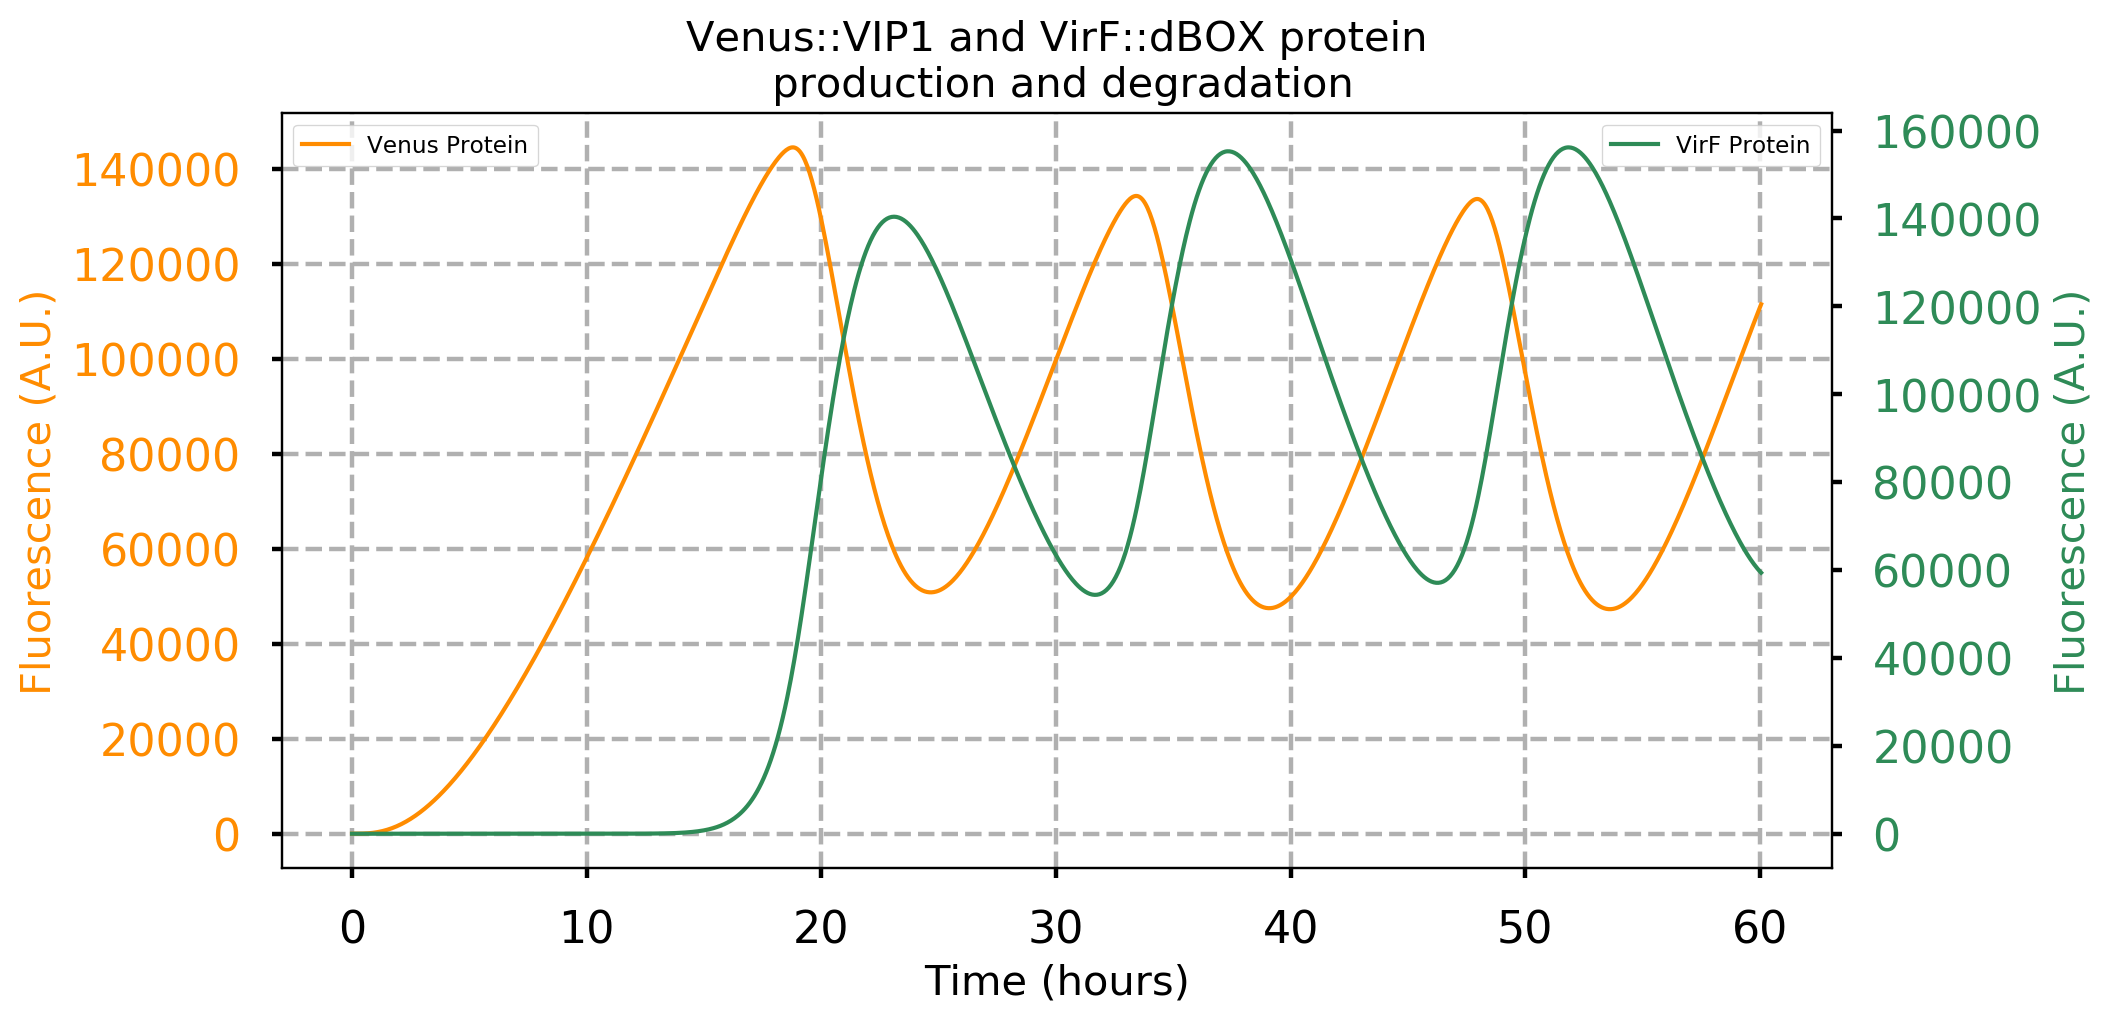

In [11]:
with plt.style.context('seaborn-poster'):
    
    fig = plt.figure(figsize=(10, 5), dpi=200)
    plt.grid('on', ls='--')
    plt.title('Venus::VIP1 and VirF::dBOX protein\n production and degradation', fontsize=15)
    
    ax1 = fig.add_subplot()
    ax1.plot(timesteps, venus_prot_results, label = 'Venus Protein', lw = 1.5, color = 'darkorange')
    ax1.set_ylabel('Fluorescence (A.U.)', fontsize=15, color = 'darkorange')
    ax1.set_xlabel('Time (hours)', fontsize=15)
    ax1.tick_params(axis='y', labelcolor='darkorange')
    plt.legend(loc='upper left', fontsize='small')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Fluorescence (A.U.)', fontsize=15, color = 'seagreen')
    ax2.plot(timesteps, virf_prot_results, label = 'VirF Protein', lw = 1.5, color = 'seagreen')
    ax2.tick_params(axis='y', labelcolor='seagreen')
    plt.legend(loc='upper right', fontsize='small')
    
plt.show()

## Phase Space of the System

In [12]:
x = np.linspace(0, 1, 20) # 1-D array of evenly spaced floats between 0 and 1
y = np.linspace(0, 1, 20) # 1-D array of evenly spaced floats between 0 and 1
z = np.linspace(0, 1, 20) # 1-D array of evenly spaced floats between 0 and 1

X, Y, Z = np.meshgrid(x, y, z) # 3-D array of evenly spaced floats between 0 and 1 in all 3 dimensions
U, V, W = np.zeros(X.shape), np.zeros(Y.shape), np.zeros(Z.shape) # Arrays that will carry the magnitude of the vector at a specific x,y,z position
nx, ny, nz = X.shape # Used for looping through all positions

t = 0 # Initial time is t=0

def cycle_oscillator(X, t):
    
    '''
    
    Function that will return a 3D array, carrying values for X, Y and Z given
    initial conditions carried in the X array. This function is used as a parameter of
    the scipy.odeint() function, that integrates a system of ODEs
    
    Input Parameters:
    
    X = 3D array carrying values for X, Y and Z
    t = Initial time to start simulation
    
    '''
    
    x, y, z = X
    
    return [k_cyca-d_cyca*x*(z**n1/(k_ca_cb**n1 + z**n1)),\
            k_cdka*(1-y)*(x**n2/(k_ca_cdka**n2 + x**n2)) - d_cdka*y, \
            k_cycb*(1-z)*(y**n3/(k_cb_cdka**n3 + y**n3)) - d_cycb*z]

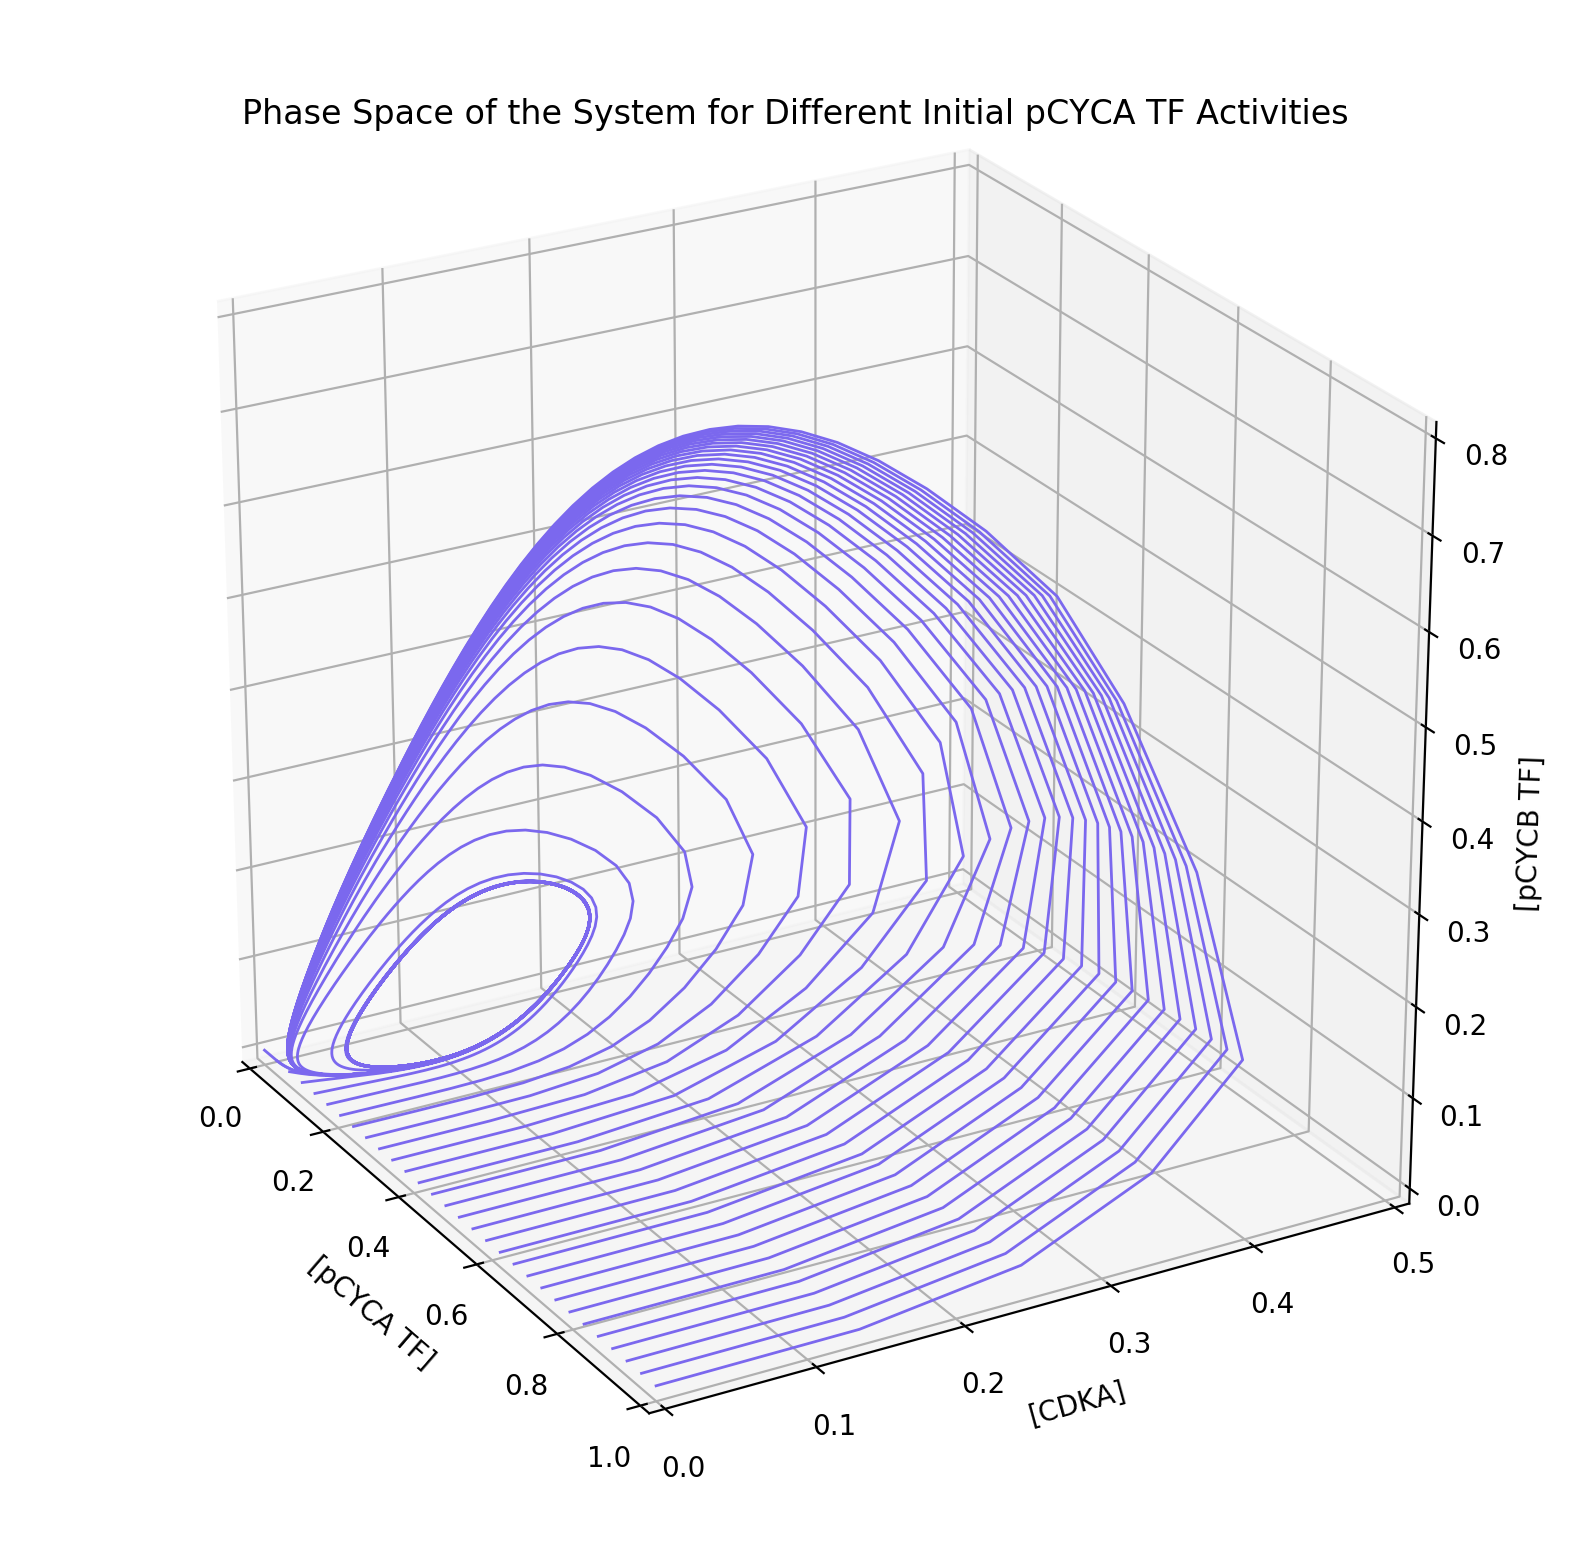

In [13]:
# Plot phase lines for different initial X
fig = plt.figure(figsize=(10,10), dpi=200)
ax = fig.gca(projection='3d')

count = 0

for x2 in np.linspace(0, 1, 30):
    
    tspan = np.linspace(0, 50, 500) # Timespan (in hours)
    x0 = [x2, 0.0, 0.0]
    xs = odeint(cycle_oscillator, x0, tspan)
    
    ax.plot(xs[:, 0], xs[:, 1], xs[:, 2], linewidth=1, color='mediumslateblue', label=r'$[pCYCA\: TF]_0 = {}$'.format(round(x2,3))) # Plot line
    count += 1

ax.set_xlabel('[pCYCA TF]')
ax.set_xlim(0, 1)
ax.set_ylabel('[CDKA]')
ax.set_ylim(0, 0.5)
ax.set_zlabel('[pCYCB TF]')
ax.set_zlim(0, 0.8)

#ax.legend(ncol=3, bbox_to_anchor=(1, 0.65))
ax.view_init(25, 330)
plt.title('Phase Space of the System for Different Initial pCYCA TF Activities')
plt.show()

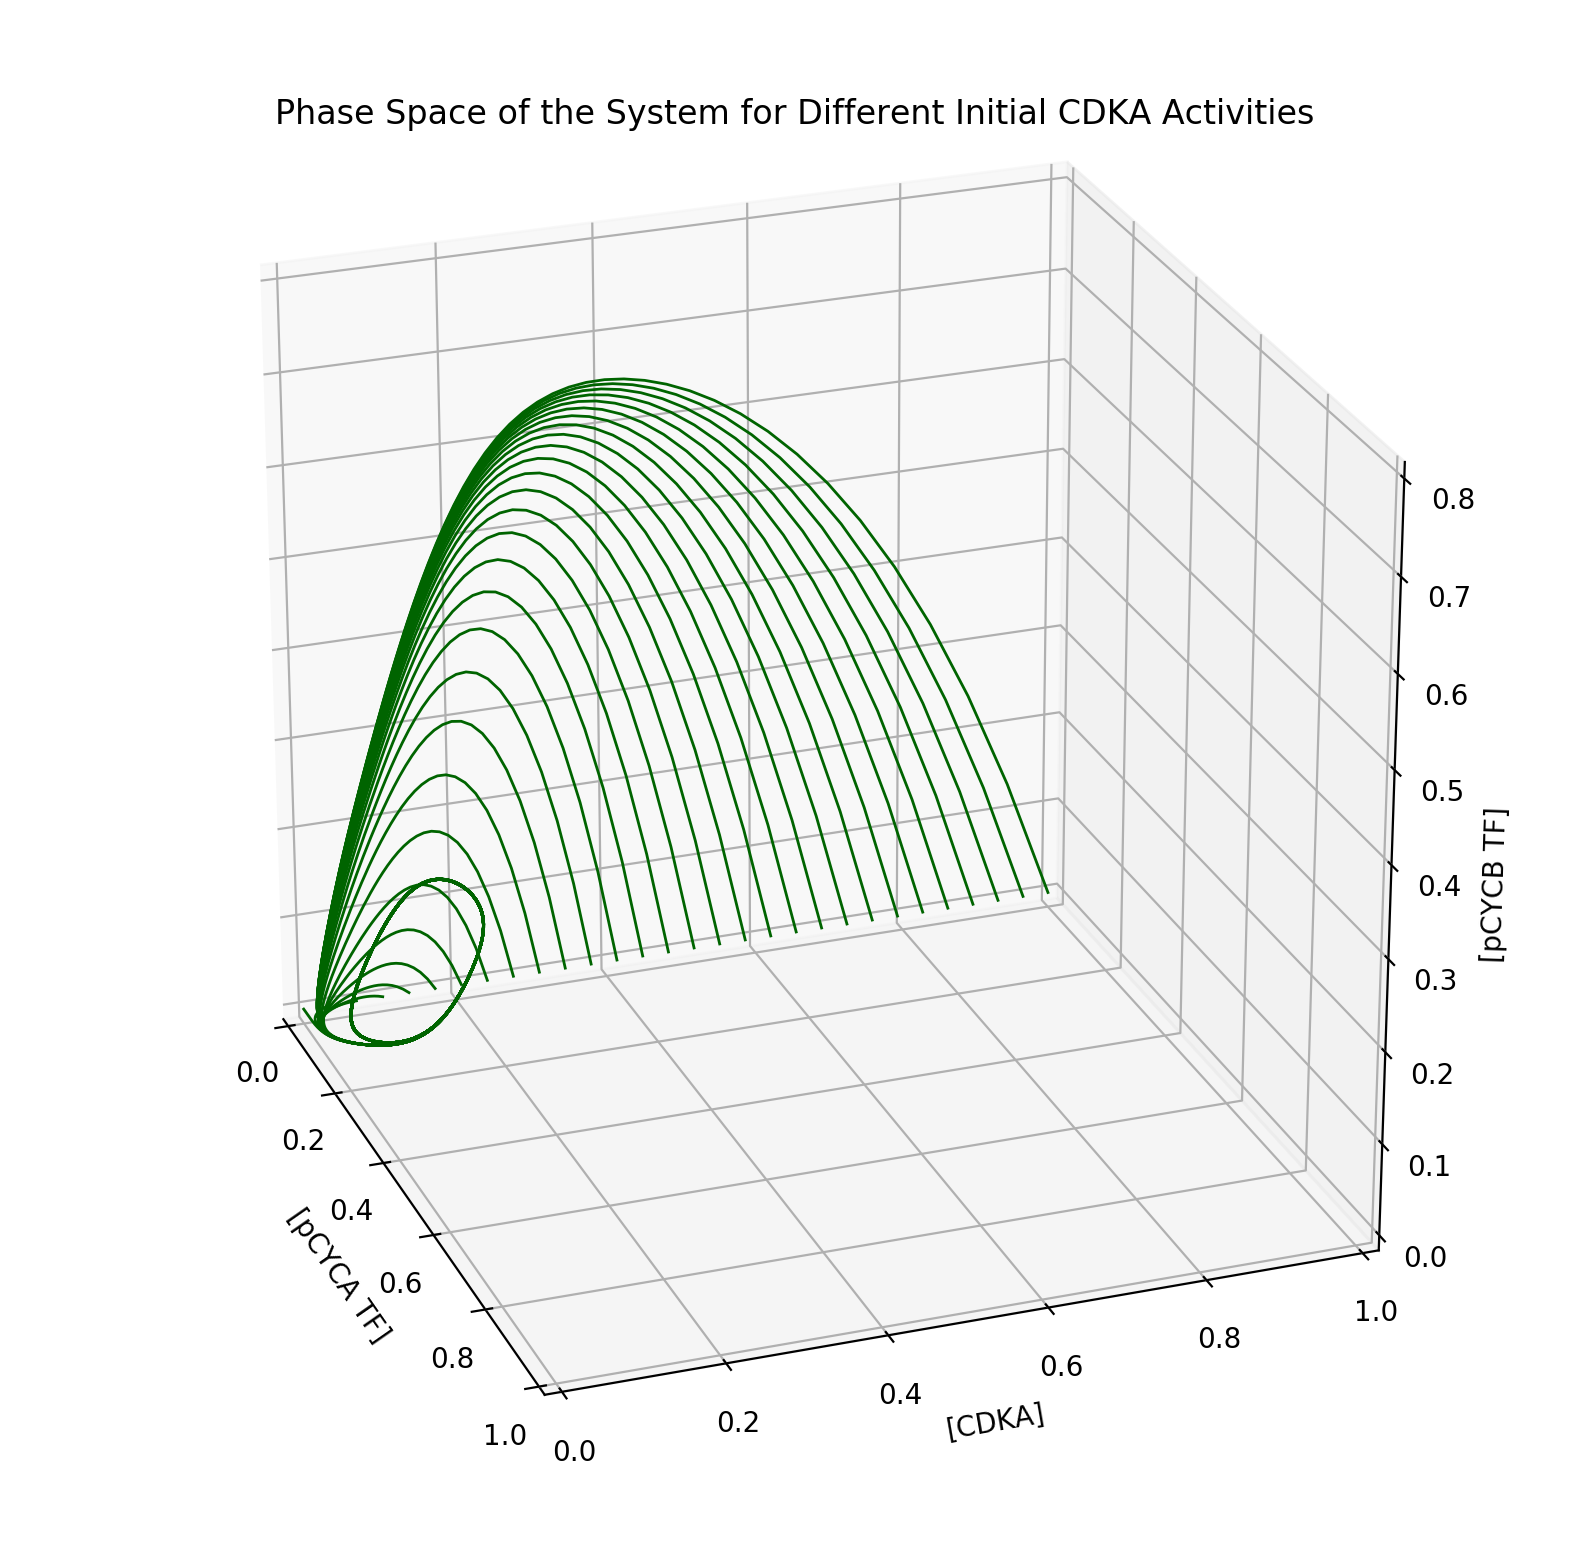

In [14]:
# Plot phase lines for different initial Y
fig = plt.figure(figsize=(10,10), dpi=200)
ax = fig.gca(projection='3d')

count = 0

for y2 in np.linspace(0, 1, 30):
    
    tspan = np.linspace(0, 50, 500) # Timespan (in hours)
    y0 = [0.0, y2, 0.0]
    ys = odeint(cycle_oscillator, y0, tspan)
    
    ax.plot(ys[:, 0], ys[:, 1], ys[:, 2], linewidth=1, color='darkgreen', label=r'$[CDKA]_0 = {}$'.format(round(y2, 3))) # Plot line
    count += 1

ax.set_xlabel('[pCYCA TF]')
ax.set_xlim(0, 1)
ax.set_ylabel('[CDKA]')
ax.set_ylim(0, 1)
ax.set_zlabel('[pCYCB TF]')
ax.set_zlim(0, 0.8)

#ax.legend(ncol=3, bbox_to_anchor=(1, 0.65))
ax.view_init(25, 340)
plt.title('Phase Space of the System for Different Initial CDKA Activities')
plt.show()

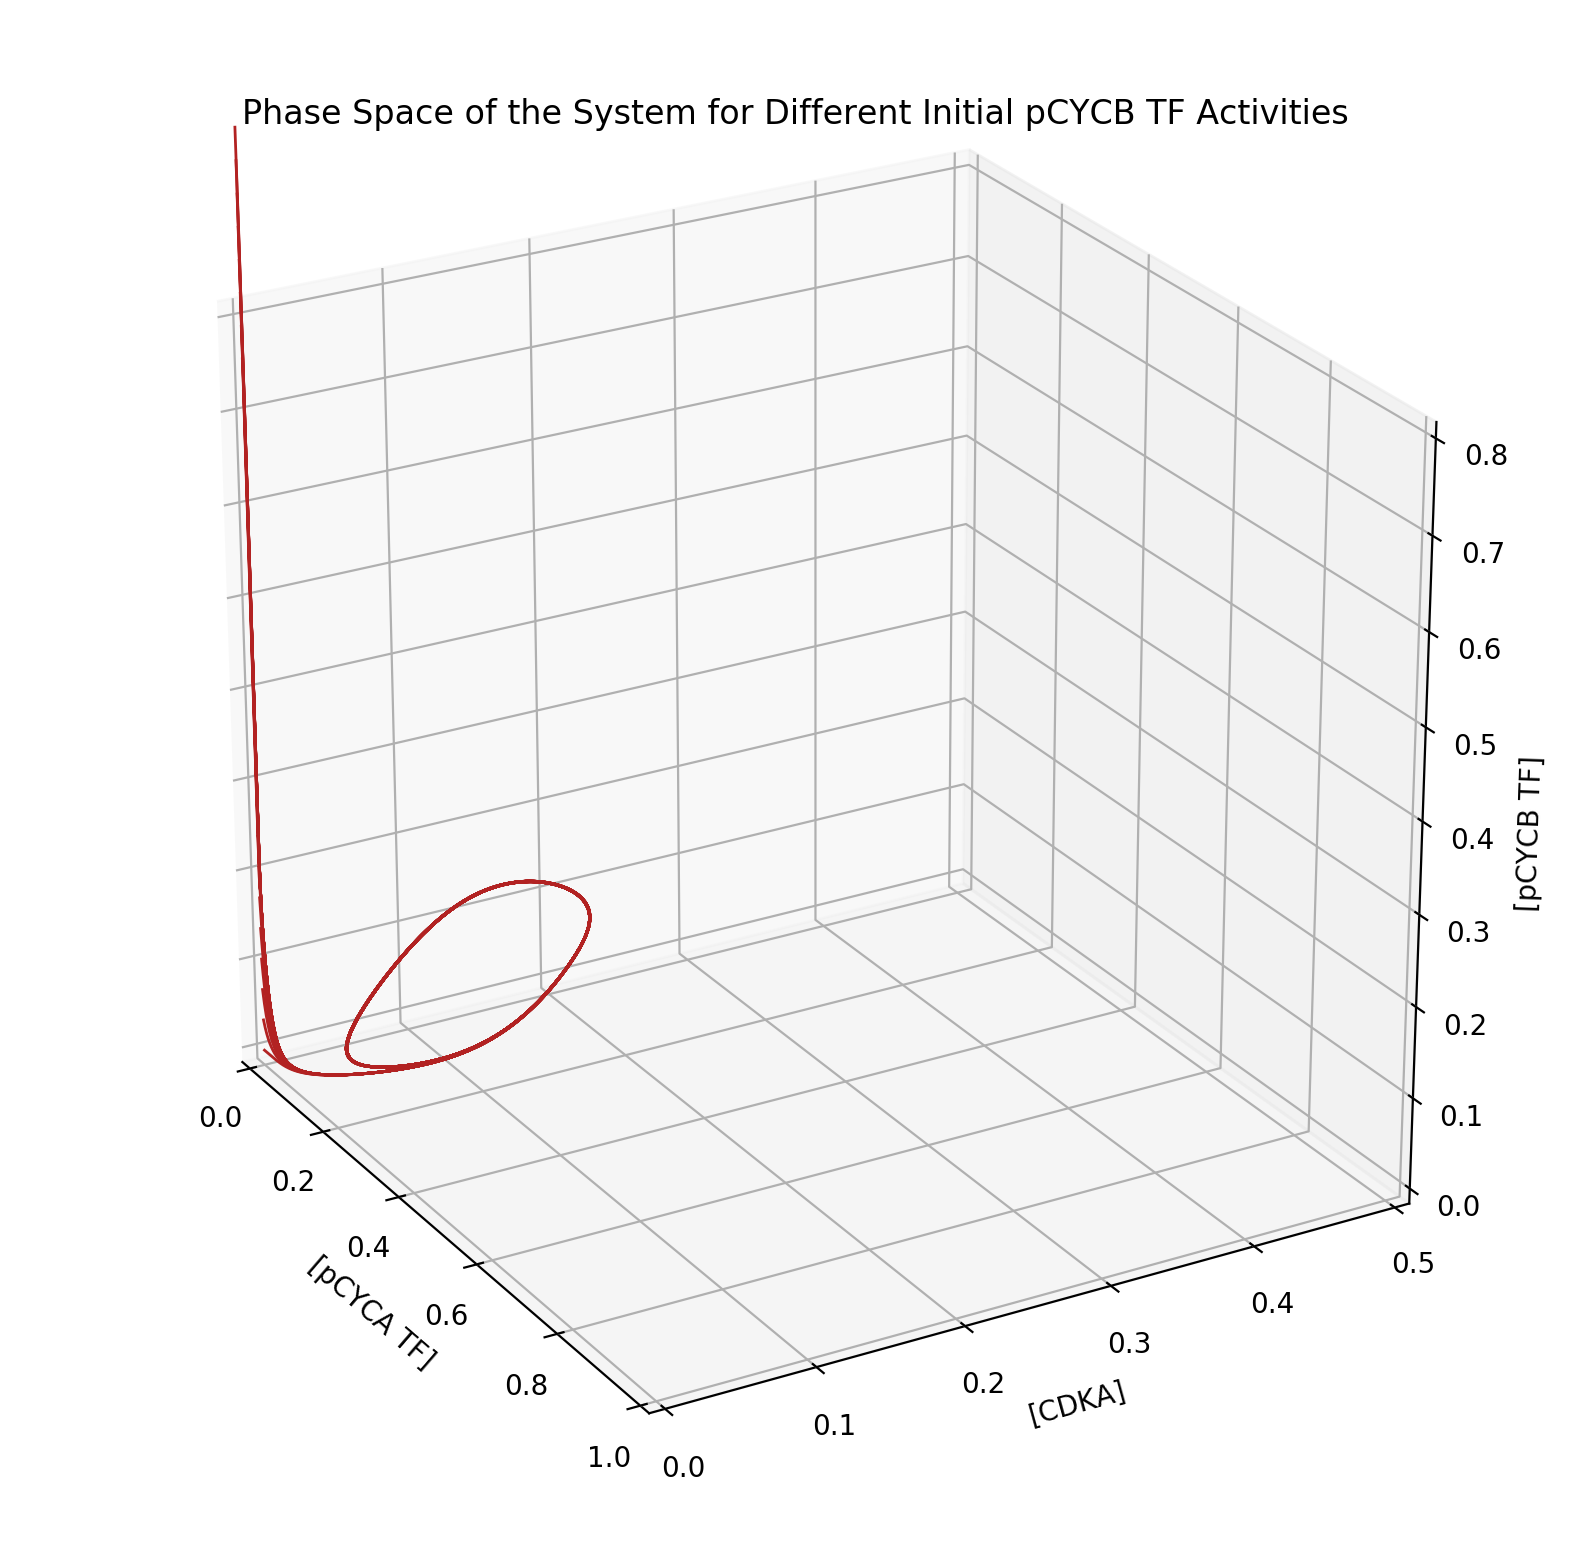

In [15]:
# Plot phase lines for different initial Z
fig = plt.figure(figsize=(10,10), dpi=200)
ax = fig.gca(projection='3d')

count = 0

for z2 in np.linspace(0, 1, 30):
    
    tspan = np.linspace(0, 50, 500) # Timespan (in hours)
    z0 = [0.0, 0.0, z2]
    zs = odeint(cycle_oscillator, z0, tspan)
    
    ax.plot(zs[:, 0], zs[:, 1], zs[:, 2], linewidth=1, color='firebrick', label=r'$[pCYCB\: TF]_0 = {}$'.format(round(z2, 3))) # Plot line
    count += 1

ax.set_xlabel('[pCYCA TF]')
ax.set_xlim(0, 1)
ax.set_ylabel('[CDKA]')
ax.set_ylim(0, 0.5)
ax.set_zlabel('[pCYCB TF]')
ax.set_zlim(0, 0.8)

#ax.legend(ncol=3, bbox_to_anchor=(1, 0.65))
ax.view_init(25, 330)
plt.title('Phase Space of the System for Different Initial pCYCB TF Activities')
plt.show()

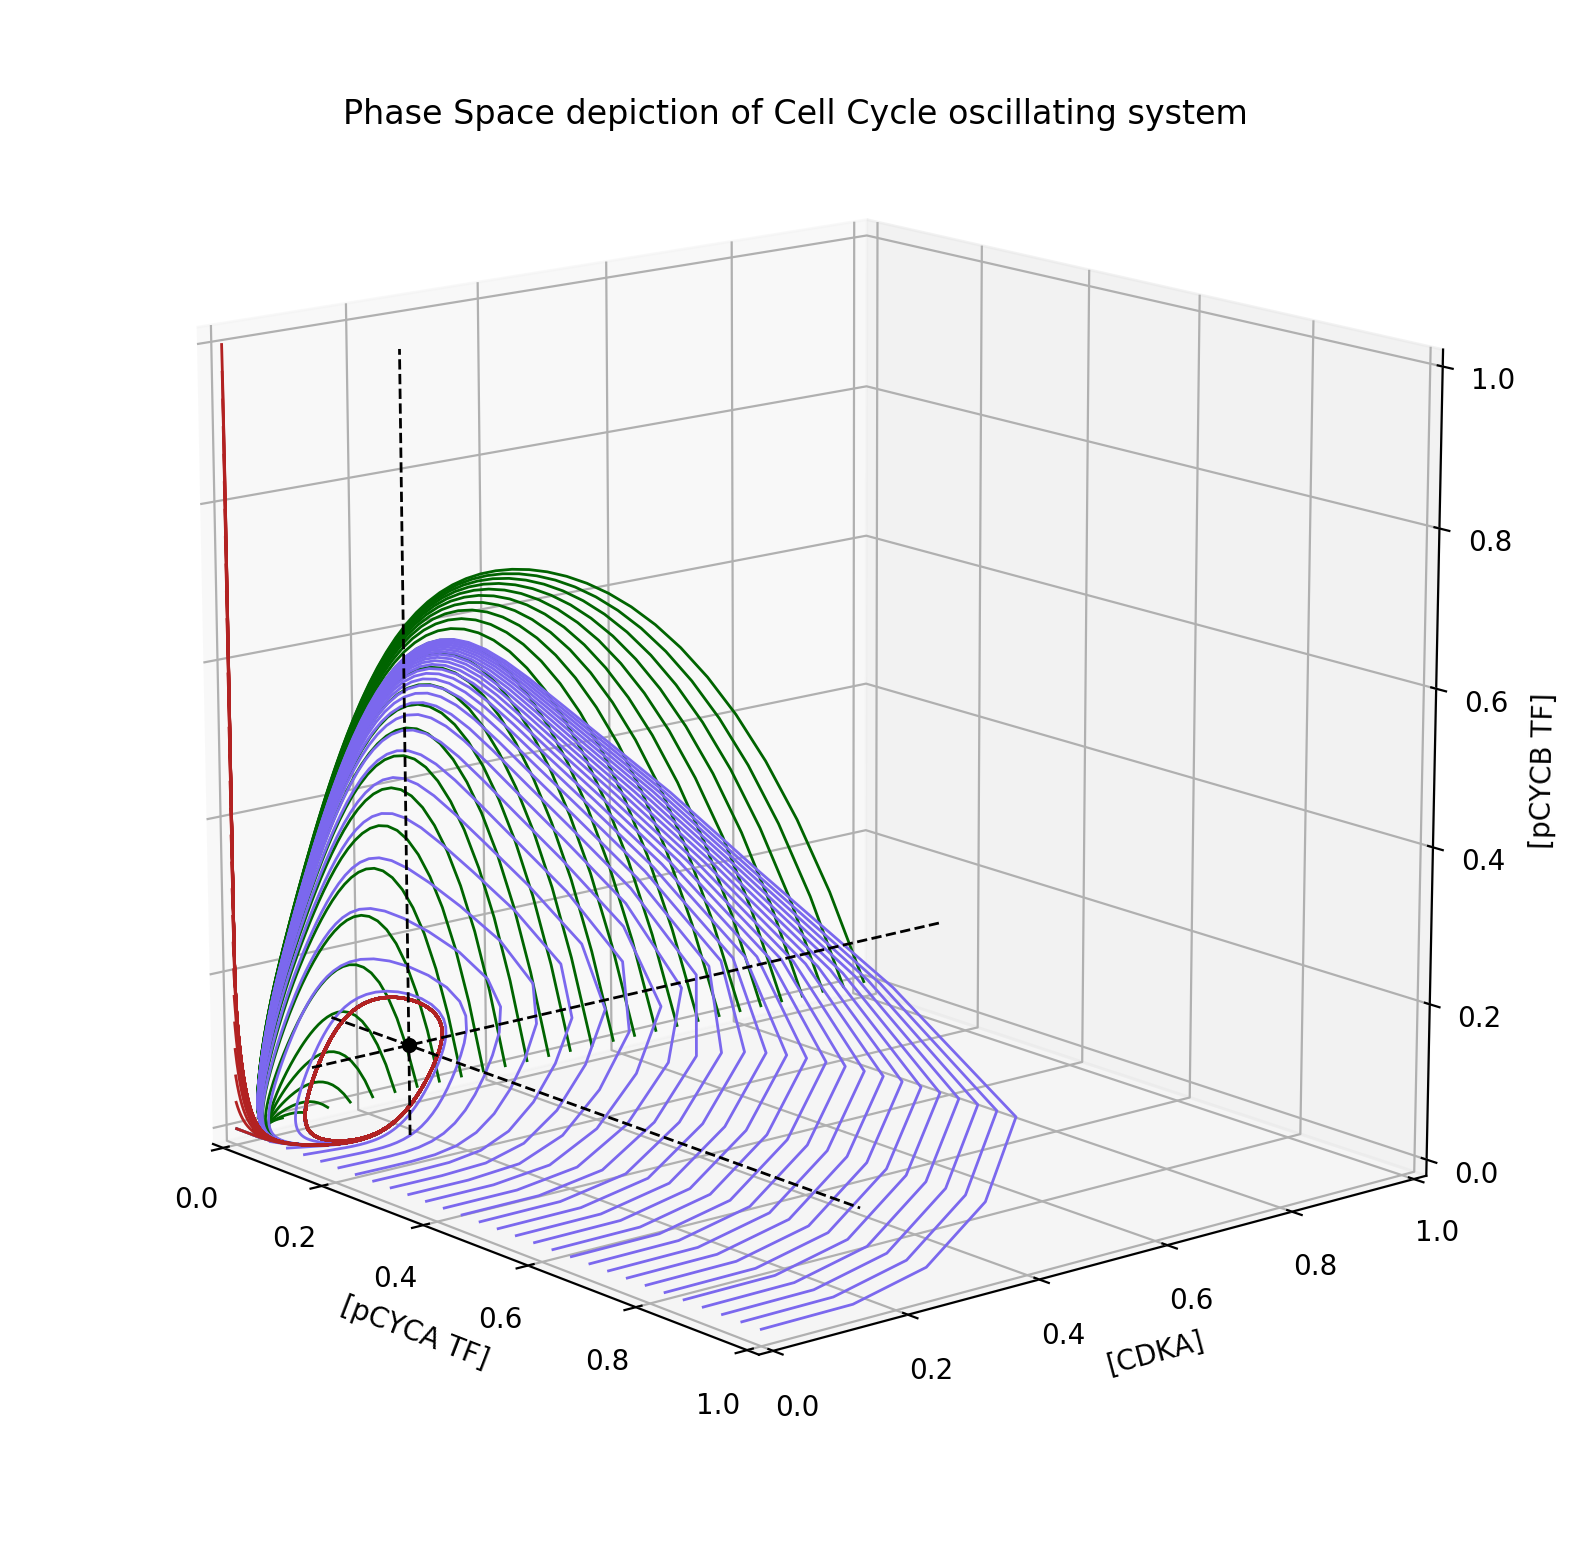

In [16]:
# Plot three dimension phase space for all variables and the equilibrium point

'''
We initialize a figure object asign an axis to the grid

countx, county and countz are used to produce the legend object, 
which is hidden for clarity


'''

fig = plt.figure(figsize=(10,10), dpi=200)
ax = fig.gca(projection='3d')

countx = 0
county = 0
countz = 0

for y2 in np.linspace(0, 1, 30): # For a range of values between 0 and 1 of CDKA
    
    tspan = np.linspace(0, 50, 500) # Timespan
    y0 = [0.0, y2, 0.0]
    ys = odeint(cycle_oscillator, y0, tspan)
    
    ax.plot(ys[:, 0], ys[:, 1], ys[:, 2], linewidth=1, color='darkgreen', label=r'$[CDKA]_0 = {}$'.format(round(y2, 3))) # Plot line
    county += 1

for x2 in np.linspace(0, 1, 30): # For a range of values between 0 and 1 of pCYCA TF
    
    tspan = np.linspace(0, 50, 500) # Timespan
    x0 = [x2, 0.0, 0.0]
    xs = odeint(cycle_oscillator, x0, tspan)
    
    ax.plot(xs[:, 0], xs[:, 1], xs[:, 2], linewidth=1, color='mediumslateblue', label=r'$[pCYCA\: TF]_0 = {}$'.format(round(x2, 3))) # Plot line
    countx += 1
    
    
for z2 in np.linspace(0, 1, 30): # For a range of values between 0 and 1 of pCYCB TF
    
    tspan = np.linspace(0, 50, 500) # Timespan
    z0 = [0.0, 0.0, z2]
    zs = odeint(cycle_oscillator, z0, tspan)
    
    ax.plot(zs[:, 0], zs[:, 1], zs[:, 2], linewidth=1, color='firebrick', label=r'$[pCYCB\: TF]_0 = {}$'.format(round(z2, 3))) # Plot line
    countz += 1

ax.scatter(0.1561, 0.145841, 0.116796, label=r'$Equilibrium\: Point$', color='black') # Equilibrium point (Attractor)
ax.plot(np.linspace(0,1,10), [0.145841]*10, [0.116796]*10, color='black', ls='dashed', lw=1) # X axis equilibrium
ax.plot([0.1561]*10, np.linspace(0,1,10), [0.116796]*10, color='black', ls='dashed', lw=1) # Y axis equilibrium
ax.plot([0.1561]*10, [0.145841]*10, np.linspace(0,1,10), color='black', ls='dashed', lw=1) # Z axis equilibrium

ax.set_xlabel('[pCYCA TF]')
ax.set_xlim(0, 1)
ax.set_ylabel('[CDKA]')
ax.set_ylim(0, 1)
ax.set_zlabel('[pCYCB TF]')
ax.set_zlim(0, 1)
ax.set_title('Phase Space depiction of Cell Cycle oscillating system')

#ax.legend(loc='upper left', title=r'$Initial\: Conditions$', bbox_to_anchor= (1.1, 0.65), ncol=6, borderaxespad=0, frameon=True)
ax.view_init(15, 320)
plt.show()